## первый

In [117]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np
digits_dataset = load_digits()

### Изучение данных

In [106]:
len(digits_dataset['feature_names'])
print("Ключи digits_dataset: \n{}\n".format(digits_dataset.keys()))
print(digits_dataset['DESCR']+"\n")
print("Названия ответов: {}\n".format(digits_dataset['target_names']))
print("Названия признаков: \n{}\n".format(digits_dataset['feature_names']))
print("Форма массива data: \n{}\n".format(digits_dataset['data'].shape))
print("Первые 10 строк массива data: \n{}\n".format(digits_dataset['data'][:10]))
print("Форма массива target: \n{}\n".format(digits_dataset['target'].shape))
print("Ответы (первые сто): \n{}".format(digits_dataset['target'][:100]))


Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test s

### Разделение данных на обучающие и тестовые наборы

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'],
                                                    random_state=0)

In [107]:
# обзор размера разделенных данных
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_train: (1347, 64)
Форма массива y_train: (1347,)
Форма массива X_test: (450, 64)
Форма массива y_test: (450,)


### Исследовать данные с помощью визуализации

C:\Users\user\PycharmProjects\pythonProject\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\user\PycharmProjects\pythonProject\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\user\PycharmProjects\pythonProject\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\user\PycharmProjects\pythonProject\venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should

<Figure size 640x480 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


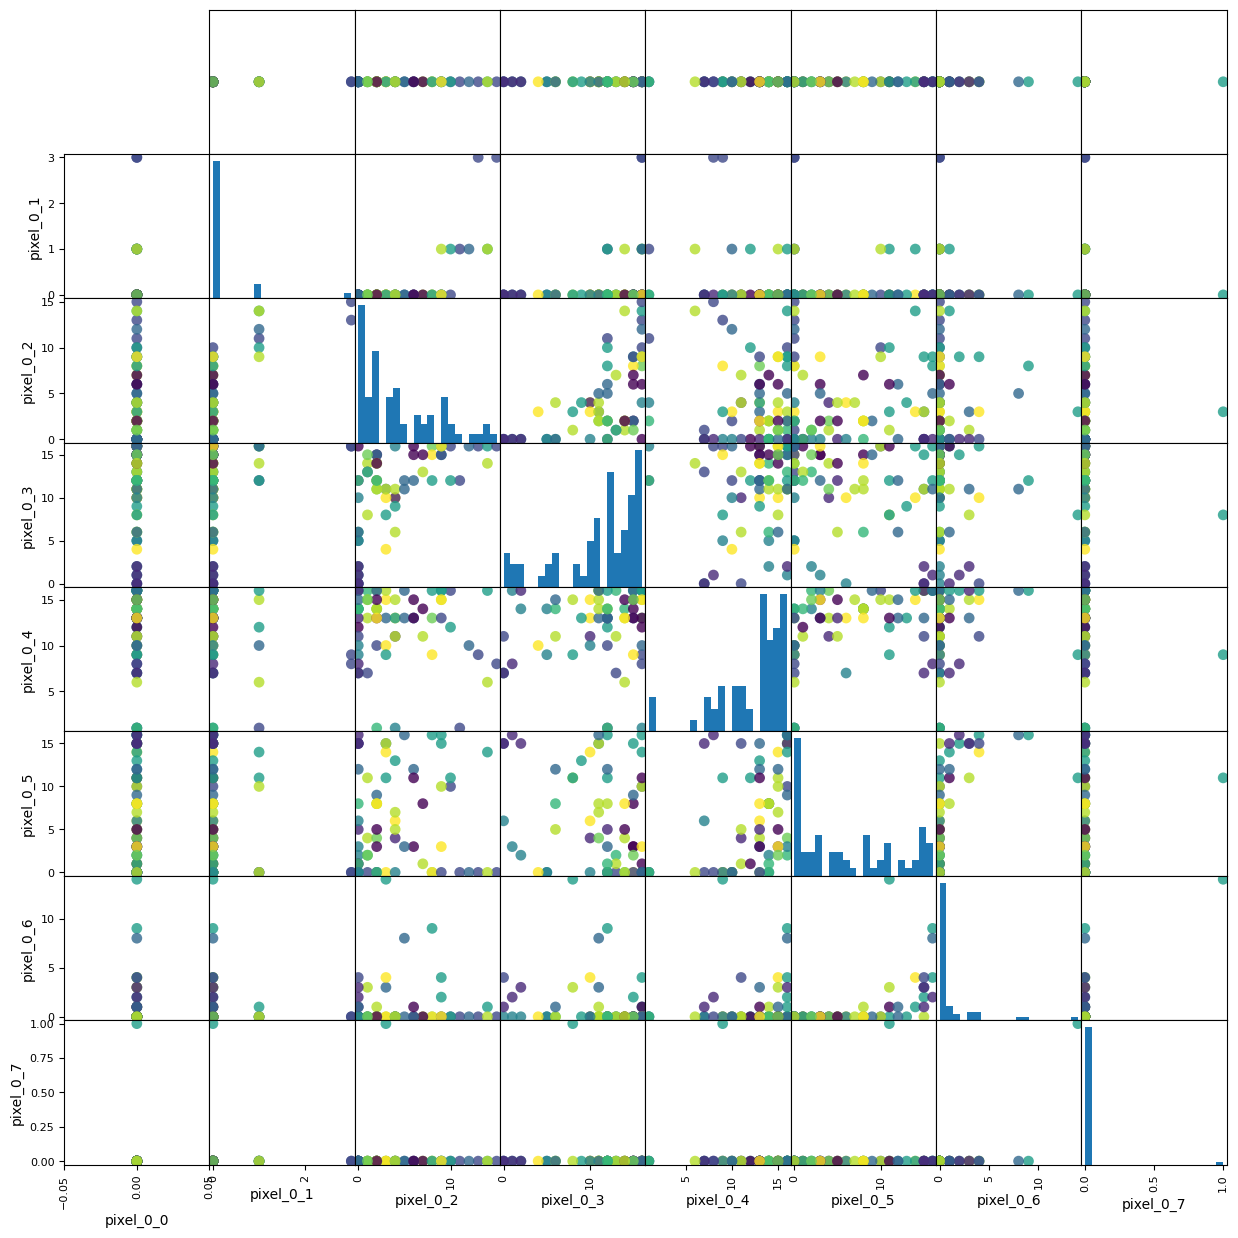

In [111]:
# Так как данных очень много, просмотр всего содержимого особо ничего не дает
# поэтому я срезал их до одного рассматриваемого изображения
# На графике показано как модель относит каждый пиксель к каждой цифре

plt.figure()
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в digits_dataset.features_names
import pandas as pd
digits_dataframe = pd.DataFrame(X_train[:64,:8], columns=digits_dataset.feature_names[:8])
# создаем таблицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.plotting.scatter_matrix(digits_dataframe, c=y_train[:64], figsize=(15,15), marker='o',
                                 hist_kwds={'bins':20}, s=60, alpha=.8)

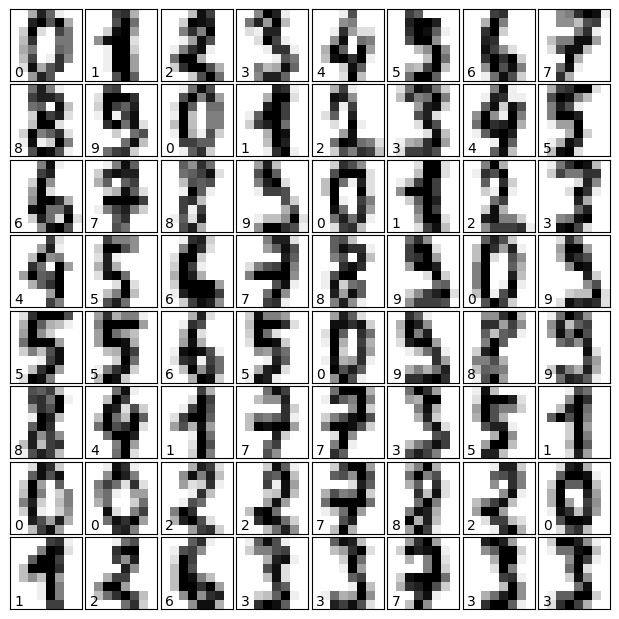

In [109]:
# Здесь отрисовываются наши наборы изображений с подписями

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8,8,i+1, xticks=[], yticks=[])
    ax.imshow(digits_dataset.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits_dataset.target[i]))

In [118]:
# метод k-средних.
# количество соседей 1
# при увеличении соседей точность значительно падает

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# помещяем тренировочные модели для классификации
knn.fit(X_train, y_train)

# тестируем нашу модель
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора: \n{}\n".format(y_pred))

# Проверка точности обученной модели
print("Правильность на текстовом наборе: {:.2f} %".format(np.mean(y_pred == y_test)))
print("Правильность на текстовом наборе: {:.2f} %".format(knn.score(X_test, y_test)))

Прогнозы для тестового набора: 
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 3 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]
Правильность на текстовом наборе: 0.99 %
Правильность 